# Features importances and visualization with SHAP (SHapley Additive exPlanations)

 The objective of this notebook is to get information about the contributions of the features. It can lead to interesting insights, like if we need to reduce the number of features our dataset have, how we decrease, etc.

 For this, we are going to use all we got until now: models with the best parameters that were trained with the full dataset, best 100 features dataset and best 50 features dataset.


 Note: For this to work, we need to pass the data scaled for the SHAP, because we cant pass the pipelined model, only the model itself contained in the last step of the pipe, for example. LR = (LogisticRegression.pkl)[-1]

In [4]:
#-------Utilities----------------
import shap
import pandas as pd
import numpy as np
import pickle


#-------Visualization----------#
import matplotlib.pyplot as plt
import seaborn as sns

#-------Scaling----------------#
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#-------Data-------------------
# Full data base
with open('data_base.pkl', 'rb') as f:
    data_base = pickle.load(f)
# Best 100 features
best_100 = pd.read_csv('best_features/LogisticRegression_100.csv')
# Best 50 features
best_50 = pd.read_csv('best_features/LogisticRegression_50.csv')

#-------Models------------------
# models trainned with full data base
with open('models/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/LinearSVC.pkl', 'rb') as f:
    LSVC = pickle.load(f)
with open('models/GradientBoostingClassifier.pkl', 'rb') as f:
    GBC = pickle.load(f)
with open('models/RandomForestClassifier.pkl', 'rb') as f:
    RF = pickle.load(f)

# models trainned with best 100 features
with open('models_2/LogisticRegression_100.pkl', 'rb') as f:
    LR_100 = pickle.load(f)
with open('models_2/LinearSVC_100.pkl', 'rb') as f:
    LSVC_100 = pickle.load(f)
with open('models_2/GradientBoostingClassifier_100.pkl', 'rb') as f:
    GBC_100 = pickle.load(f)
with open('models_2/RandomForestClassifier_100.pkl', 'rb') as f:
    RF_100 = pickle.load(f)

# models trainned with best 50 features
with open('models_2/LogisticRegression_50.pkl', 'rb') as f:
    LR_50 = pickle.load(f)
with open('models_2/LinearSVC_50.pkl', 'rb') as f:
    LSVC_50 = pickle.load(f)
with open('models_2/GradientBoostingClassifier_50.pkl', 'rb') as f:
    GBC_50 = pickle.load(f)
with open('models_2/RandomForestClassifier_50.pkl', 'rb') as f:
    RF_50 = pickle.load(f)



Getting our X and y data

In [5]:
info_cols = ['date',
 'home_team',
 'away_team',
 'season',
 'home_win' ]
X = data_base.drop(info_cols, axis=1)
y = data_base['home_win']

#X and y shape
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (2027, 264)
y shape:  (2027,)


In [6]:
# Initialize JavaScript visualization
shap.initjs()

## Linear Regression SHAP values

In [7]:
# Scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# returnig to dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,home_rolling_fg,home_rolling_fga,home_rolling_fg%,home_rolling_3p,home_rolling_3pa,home_rolling_3p%,home_rolling_ft,home_rolling_fta,home_rolling_ft%,home_rolling_orb,...,away_rolling_opponent_drb%_max,away_rolling_opponent_trb%_max,away_rolling_opponent_ast%_max,away_rolling_opponent_stl%_max,away_rolling_opponent_blk%_max,away_rolling_opponent_tov%_max,away_rolling_opponent_usg%_max,away_rolling_opponent_ortg_max,away_rolling_opponent_drtg_max,away_rolling_opponent_Total
0,1.171954,-0.455332,1.530733,-0.242996,-0.802644,0.511868,0.165988,0.321821,-0.410380,-0.521061,...,-0.226904,-0.142992,0.014645,-0.463457,-0.535915,0.818837,-0.383223,0.572141,0.056718,1.279552
1,1.610837,0.371182,1.512520,1.883813,1.012125,1.679623,-0.496329,-0.018314,-1.045001,-0.812586,...,-0.182705,-0.150315,0.908783,0.833711,-1.001114,1.839667,-0.930405,-0.430788,-1.977322,-1.594831
2,1.422744,0.887753,0.911518,0.229628,0.278495,0.025682,0.768094,0.661956,0.227671,-0.909760,...,0.740274,-0.175947,2.817676,-0.329267,-1.220346,0.848862,-0.357167,-0.794595,-1.328788,-0.769777
3,0.168792,0.009582,0.091968,0.623481,0.741840,-0.078825,0.647673,0.224639,1.147014,-1.395634,...,0.906671,0.051075,0.935004,-0.481349,1.036138,1.813396,-0.878293,0.247664,0.439943,0.614185
4,1.171954,1.352668,0.395505,-0.085455,-0.030402,-0.010668,0.948726,1.536590,-0.959242,-0.229537,...,1.044468,0.032767,-0.331473,-0.749729,-0.370154,-0.160709,0.880506,1.476744,-0.149634,-0.503630


In [8]:
# Create SHAP explainer
explainer = shap.LinearExplainer(LR[-1], X_scaled, seed=42)
shap_values = explainer.shap_values(X_scaled)

We know that the home_rolling_+/-_max is amongst the top 2 features most important. Lets visualize the dependence level with 3 of the most impactigul feature on this. We can get the insight of what are the features that impacts the most on this variable.

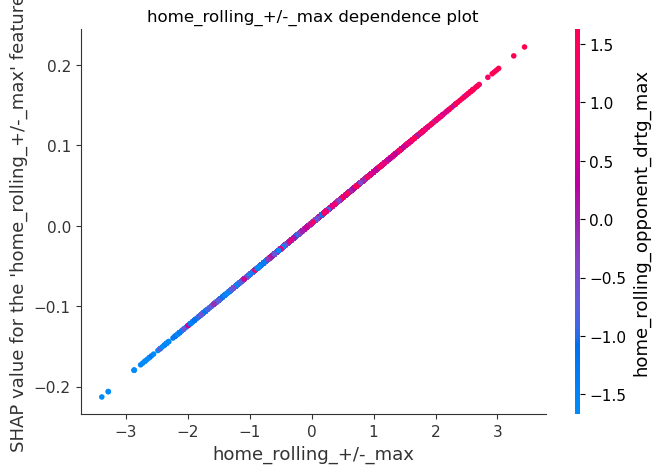

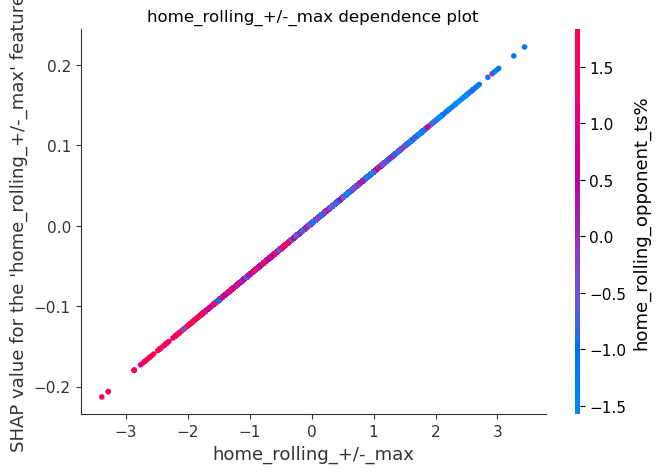

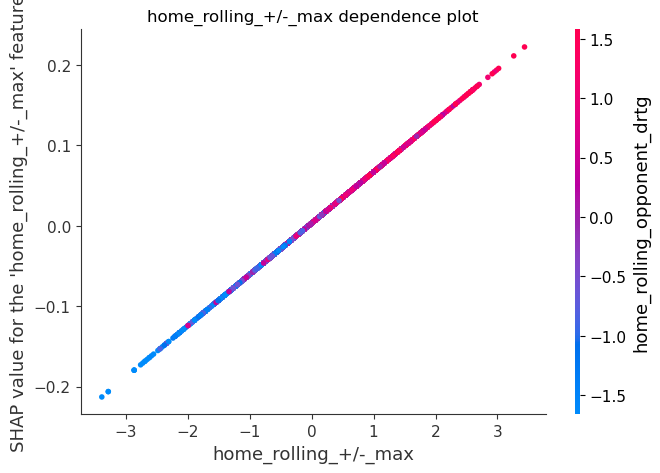

In [9]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions('home_rolling_+/-_max', shap_values, X_scaled)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot('home_rolling_+/-_max', shap_values, X_scaled, interaction_index=inds[i], show=False)
    plt.title("home_rolling_+/-_max dependence plot")
    plt.ylabel("SHAP value for the 'home_rolling_+/-_max' feature")
    plt.show()

Top contributions for the model output

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


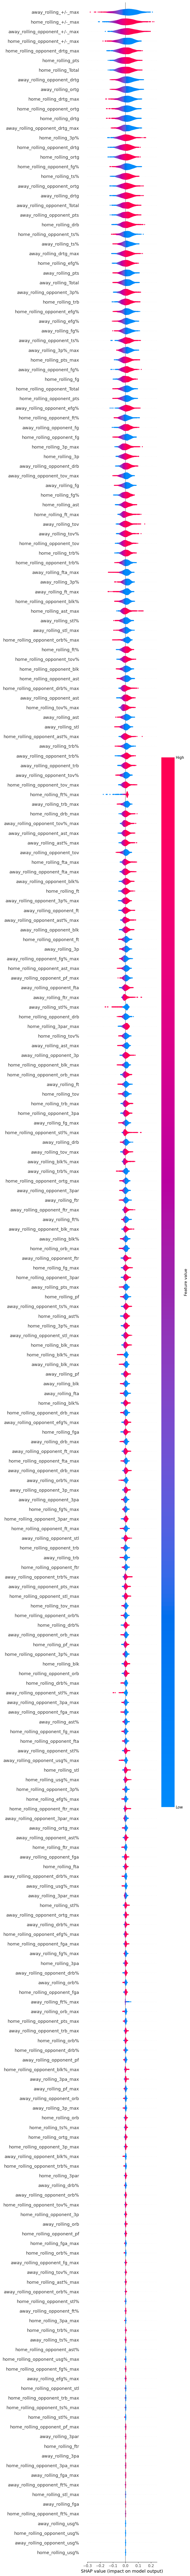

In [10]:
shap.summary_plot(shap_values, X_scaled, max_display=X_scaled.shape[1], plot_type='violin')

# Doing it again for the 50 best features dataset

In [11]:
#Again the shape of the data
print('X shape: ', X_scaled.shape)
print('y shape: ', y.shape)
X_scaled.head(2)


X shape:  (2027, 264)
y shape:  (2027,)


,home_rolling_fg,home_rolling_fga,home_rolling_fg%,home_rolling_3p,home_rolling_3pa,home_rolling_3p%,home_rolling_ft,home_rolling_fta,home_rolling_ft%,home_rolling_orb,...,away_rolling_opponent_drb%_max,away_rolling_opponent_trb%_max,away_rolling_opponent_ast%_max,away_rolling_opponent_stl%_max,away_rolling_opponent_blk%_max,away_rolling_opponent_tov%_max,away_rolling_opponent_usg%_max,away_rolling_opponent_ortg_max,away_rolling_opponent_drtg_max,away_rolling_opponent_Total
0,1.171954,-0.455332,1.530733,-0.242996,-0.802644,0.511868,0.165988,0.321821,-0.410380,-0.521061,...,-0.226904,-0.142992,0.014645,-0.463457,-0.535915,0.818837,-0.383223,0.572141,0.056718,1.279552
1,1.610837,0.371182,1.512520,1.883813,1.012125,1.679623,-0.496329,-0.018314,-1.045001,-0.812586,...,-0.182705,-0.150315,0.908783,0.833711,-1.001114,1.839667,-0.930405,-0.430788,-1.977322,-1.594831


In [12]:
#Loading the 50 best features
best_50 = pd.read_csv('best_features/LogisticRegression_50.csv', names=['features'])[1:] # because the defalut column name 0 got in the first row
best_50.head()


,features
1,home_rolling_ft
2,home_rolling_drb
3,home_rolling_pts
4,home_rolling_orb%
5,home_rolling_ast%


In [13]:
#Creating a new dataframe with the 50 best features
X_50 = X_scaled[best_50['features']]
print(X_50.shape)
X_50.head()

(2027, 50)


,home_rolling_ft,home_rolling_drb,home_rolling_pts,home_rolling_orb%,home_rolling_ast%,home_rolling_trb_max,home_rolling_pts_max,home_rolling_+/-_max,home_rolling_drb%_max,home_rolling_tov%_max,...,away_rolling_opponent_tov%,away_rolling_opponent_usg%,away_rolling_opponent_drtg,away_rolling_opponent_fta_max,away_rolling_opponent_+/-_max,away_rolling_opponent_ast%_max,away_rolling_opponent_stl%_max,away_rolling_opponent_tov%_max,away_rolling_opponent_drtg_max,away_rolling_opponent_Total
0,0.165988,0.917097,0.978142,-0.093439,-0.997193,-0.335167,-0.485245,0.580915,0.889997,1.921967,...,0.337669,0.0,0.062450,2.209376,-0.198369,0.014645,-0.463457,0.818837,0.056718,1.279552
1,-0.496329,2.102949,1.770027,-0.621835,-0.198311,-0.233341,1.123902,1.207845,-1.202656,1.762990,...,2.302917,0.0,-2.338553,-1.366243,0.618341,0.908783,0.833711,1.839667,-1.977322,-1.594831
2,0.768094,1.378262,1.611650,-1.169802,-0.390573,0.784921,0.855711,-0.463969,0.472449,0.915711,...,-0.934571,0.0,-0.928968,0.248553,-1.131752,2.817676,-0.329267,0.848862,-1.328788,-0.769777
3,0.647673,1.114739,0.634992,-1.321471,0.948631,-1.862560,1.213299,0.441597,-0.281594,1.121659,...,0.161831,0.0,0.403077,1.632663,-0.237260,0.935004,-0.481349,1.813396,0.439943,0.614185
4,0.948726,0.126529,1.374085,-0.670761,0.063563,-0.029689,0.721615,-0.394310,0.246482,0.760347,...,-0.241562,0.0,0.225840,-0.328160,-1.092861,-0.331473,-0.749729,-0.160709,-0.149634,-0.503630


## Getting our SHAP analysis, with dataset of 50 featues and model trained on this dataset, LR_50

In [14]:
# Create SHAP explainer
explainer = shap.LinearExplainer(LR_50[-1], X_50, seed=42)
shap_values = explainer.shap_values(X_50)

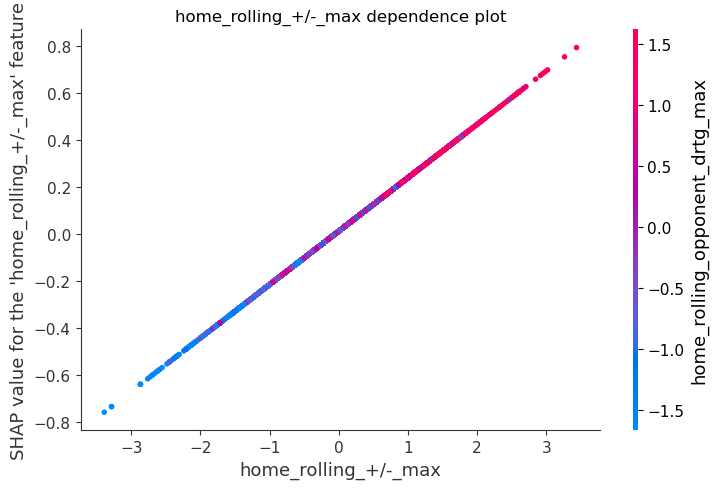

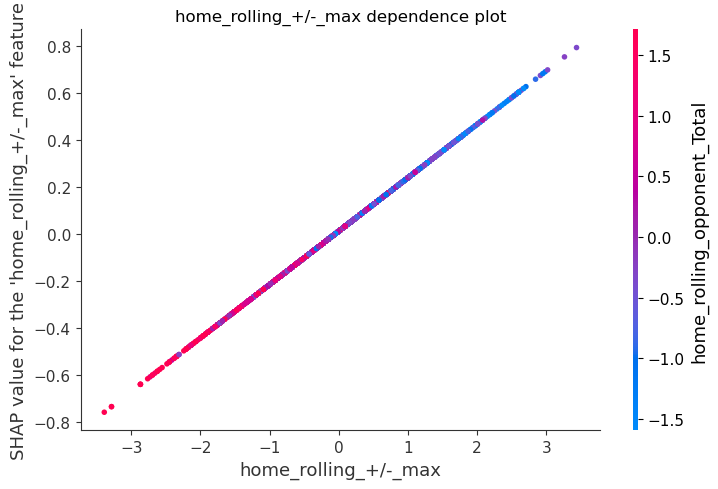

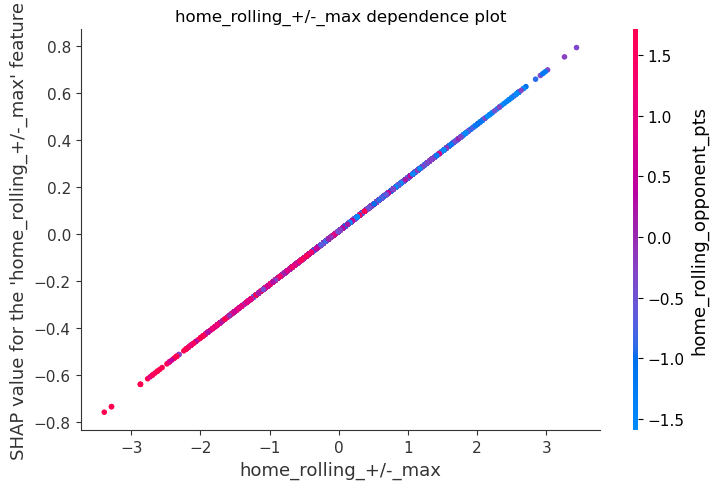

In [22]:
# we can use shap.approximate_interactions to guess which features
# may interact with age
inds = shap.approximate_interactions('home_rolling_+/-_max', shap_values, X_50)

# make plots colored by each of the top three possible interacting features
for i in range(3):
    shap.dependence_plot('home_rolling_+/-_max', shap_values, X_50, interaction_index=inds[i], show=False)
    plt.title("home_rolling_+/-_max dependence plot")
    plt.ylabel("SHAP value for the 'home_rolling_+/-_max' feature")
    plt.tight_layout()
    plt.show()

Top contributions for the model output

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


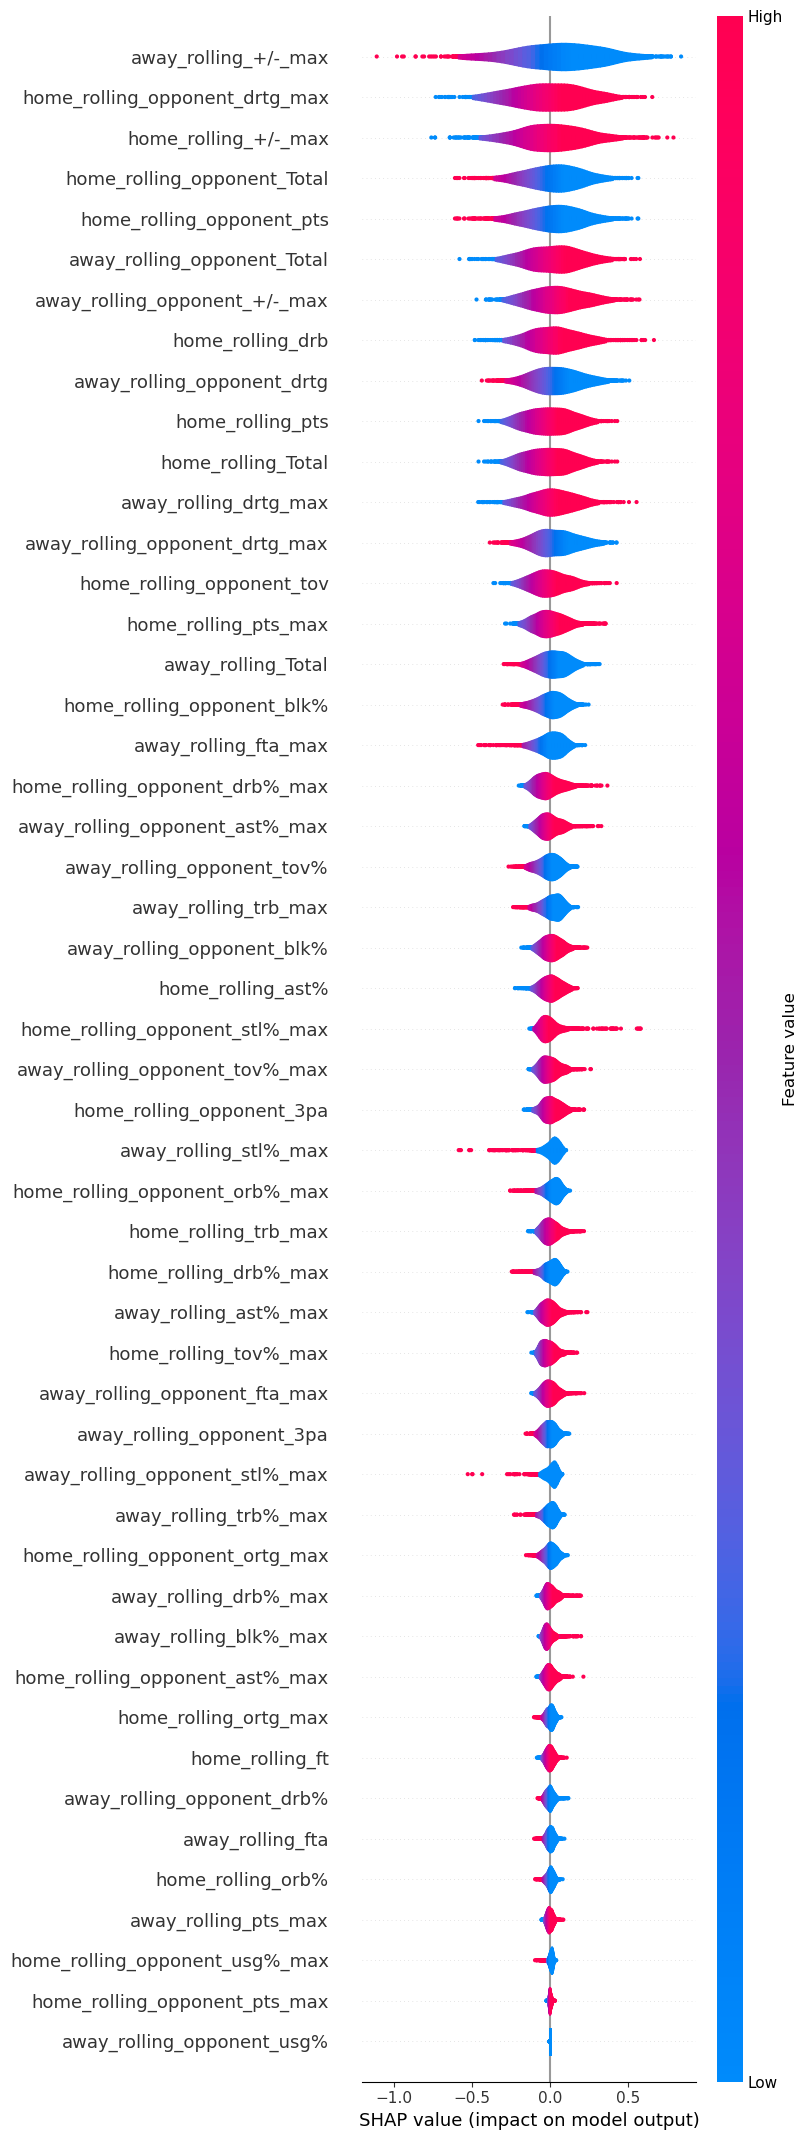

In [16]:
shap.summary_plot(shap_values, X_50, max_display=X_50.shape[1], plot_type='violin')

## Conclusion

We can see, as we saw in notebook 3 on models development, that the top features aways has the top performing player on the game presence, when using all features. But when using less features, we can see that to whole team stats also are up there!

## Checking for outliers, missing values and the distributions of the top 10 features

In [17]:
#getting the 10 most impactfull features names in a list from the 50 features dataset.
#The 10 most impactfull features are the ones with the highest absolute value of the mean of the SHAP values. 
#As we saw in the above plot, the most impactfull feature is: away_rolling_+/-_max

Top10 = np.abs(shap_values).sum(0).argsort()[-10:][::-1]
Top10 = X_50.columns[Top10]
Top10





Index(['away_rolling_+/-_max', 'home_rolling_opponent_drtg_max',
       'home_rolling_+/-_max', 'home_rolling_opponent_Total',
       'home_rolling_opponent_pts', 'away_rolling_opponent_Total',
       'away_rolling_opponent_+/-_max', 'home_rolling_drb',
       'away_rolling_opponent_drtg', 'home_rolling_pts'],
      dtype='object')

## Missing values

In [18]:
#checking for missing values on the entire data base
data_base.isnull().sum().any()

False

### Distributions

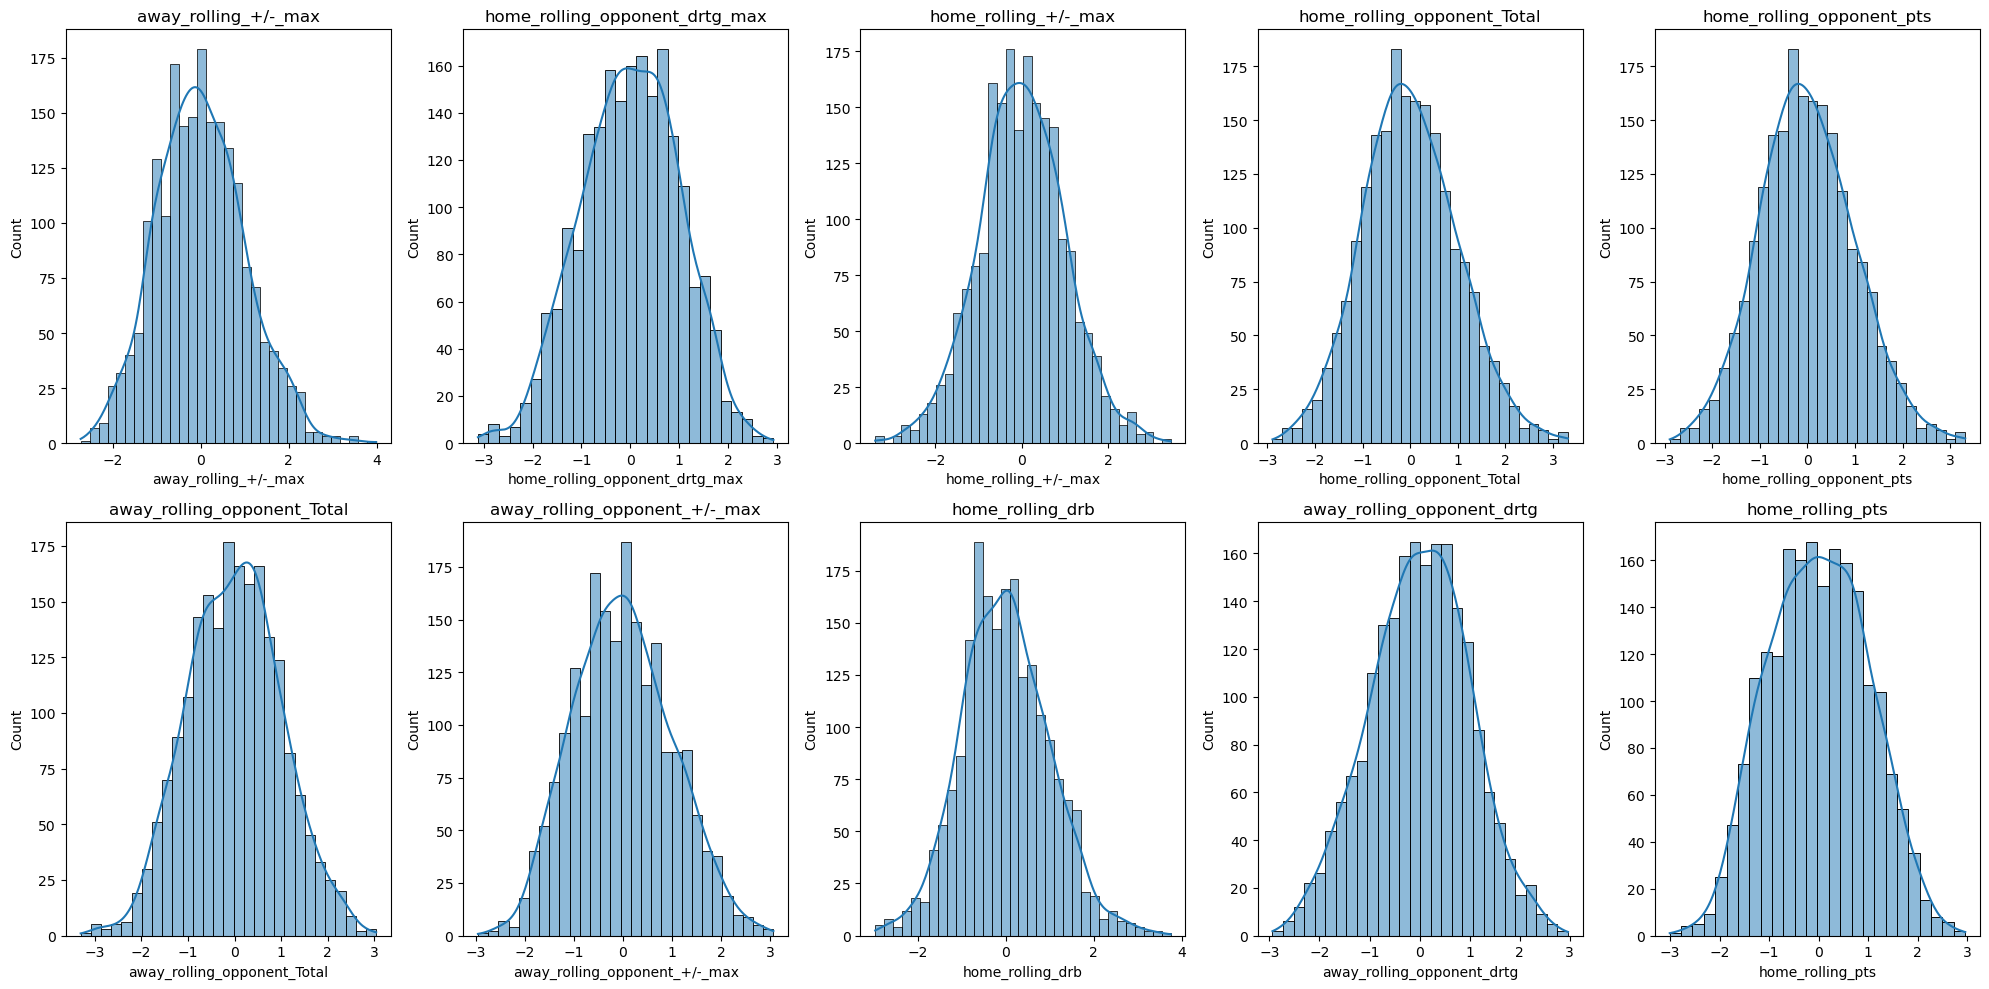

In [19]:
# plotting a histograma of the 10 most important features, with subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()): #type: ignore # flatten() returns a copy of the array collapsed into one dimension.
    sns.histplot(data=X_50, x=Top10[i], kde=True, ax=ax)
    ax.set_title(Top10[i])
plt.tight_layout()
plt.show()

### Outliers
To detect outliers on the top features, we are going to use raw data.

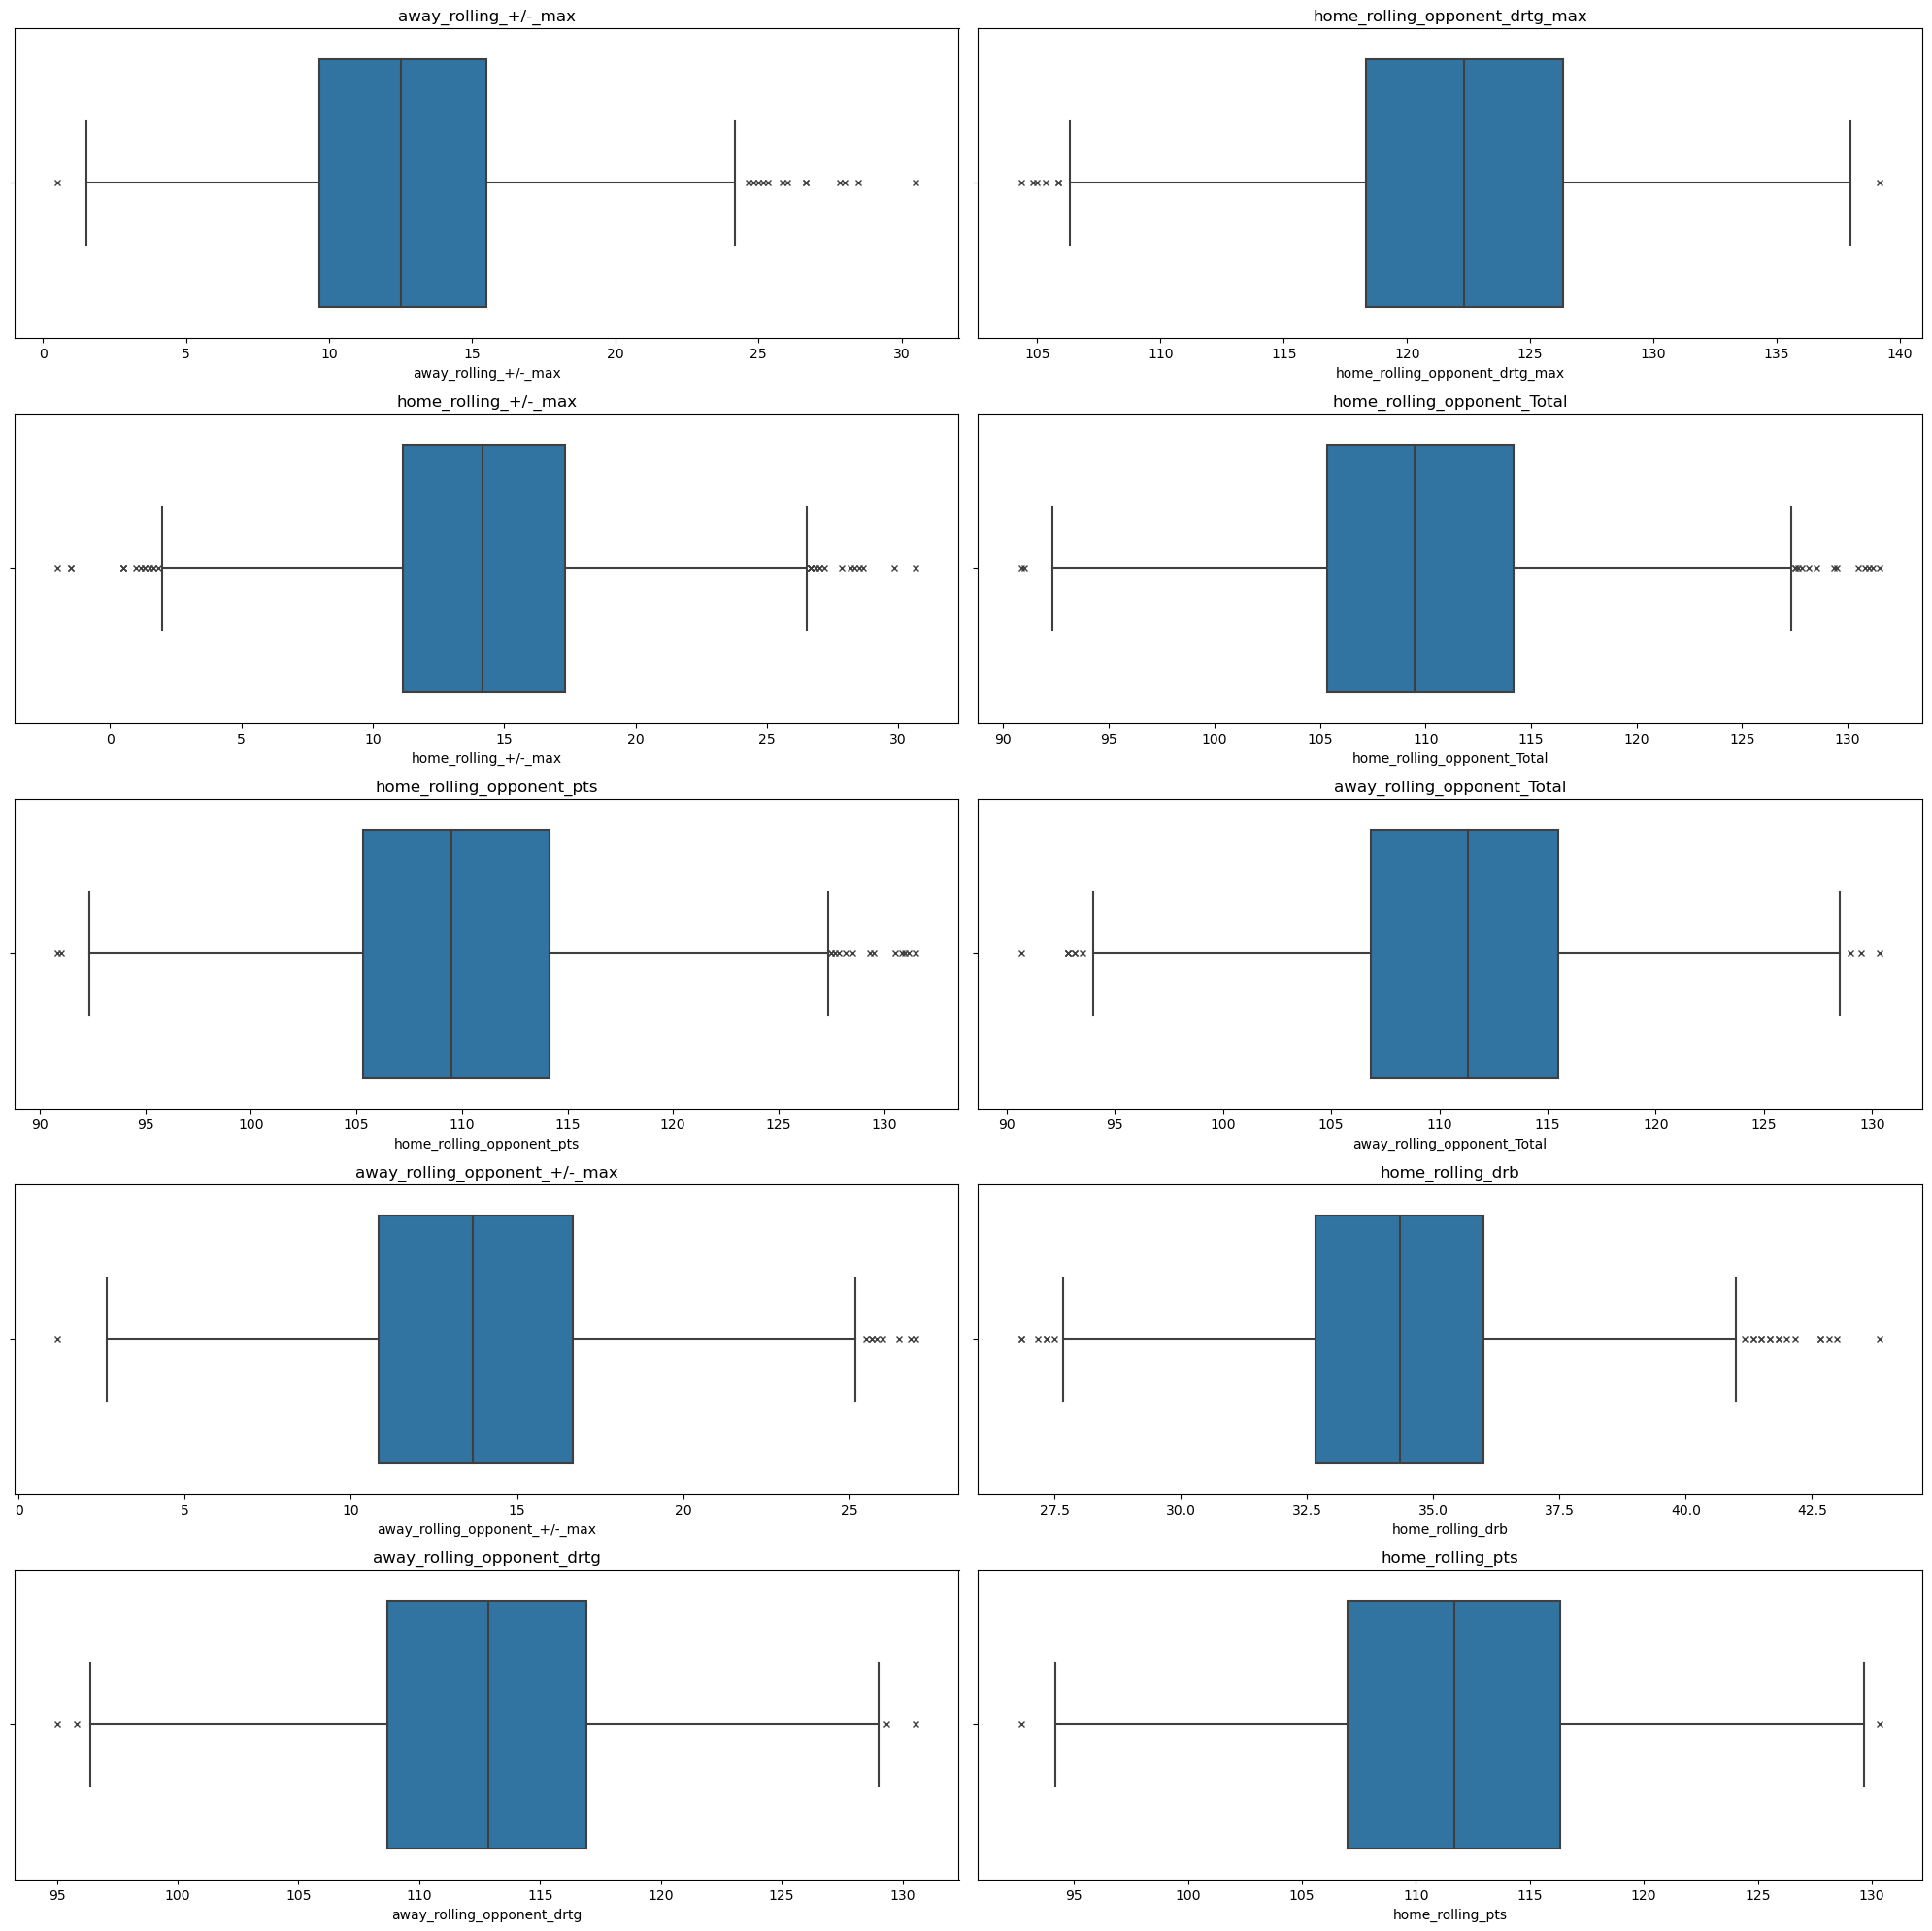

In [20]:
# We are going to use boxplots to detect outliers in the 10 most important features

fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()): #type: ignore # flatten() returns a copy of the array collapsed into one dimension.
    sns.boxplot(data=X, x=Top10[i], ax=ax, flierprops=dict(markerfacecolor='r', marker='x'))
    ax.set_title(Top10[i])
plt.tight_layout()
plt.show()

Seens like we could remove some few outliers. Lets see the percentage of rows that we would remove, choosing only the samples within the 10% and 90% quantile. If the percentage is >10%, we will not remove it.

In [21]:
# Checking the percentage of rows that we would remove, choosing only the samples within the 25 and 75% quantile
# top 10 features:
print('Percentage of rows that would be removed, if we choose only the samples within the 10 and 90% quantile')
for col in Top10:
    print(col, 
          round((X_50.shape[0] - X_50[(X_50[col] > X_50[col].quantile(0.1)) & (X_50[col] < X_50[col].quantile(0.9))]
                 .shape[0])/X_50.shape[0]*100, 2), '%\n')



Percentage of rows that would be removed, if we choose only the samples within the 10 and 90% quantile
away_rolling_+/-_max 20.72 %

home_rolling_opponent_drtg_max 20.82 %

home_rolling_+/-_max 20.33 %

home_rolling_opponent_Total 20.23 %

home_rolling_opponent_pts 20.23 %

away_rolling_opponent_Total 20.72 %

away_rolling_opponent_+/-_max 20.57 %

home_rolling_drb 20.33 %

away_rolling_opponent_drtg 20.03 %

home_rolling_pts 20.42 %



## Final Conclusion 

Our database was kind to us. There is no extremely need to manipulate the data in any way other than scaling. The *distributions are Gaussian*, there are *no significative outliers* with 0.1 and 0.9 interquantiles, and there are *no missing values*.